In [1]:
#%matplotlib notebook

# NIX_Testing is the package name
# NIX_Image class stores info on invidiual images whereas NIX_Image_List stores a list of NIX_Image(s).
from NIX_Testing import NIX_Image_List, NIX_Image
import matplotlib.pyplot as plt



In [2]:
# Define where the data lives
data_dir = '/home/ydallilar/Documents/NIX/nixDetBackup'
data_dir = '/home/ydallilar/Documents/MPE/ERIS/NIX/nixDetBackup'


In [3]:
# Define test_id to include files from specific tests. Multiple test_ids is ok.
# Then define config dict and init NIX_Image_List
test_ids = ['PER-045-12-1']
config = {'test_ids' : test_ids, 'data_dir' : data_dir}
NIX_Darks = NIX_Image_List(config)

In [4]:
# Print the contents of NIX_Image_List
keywords = ['MJD-OBS', 'HIERARCH ESO DET READ CURNAME']
tbl_fmt = '%20s,%40s,%20s,%20s'

NIX_Darks.printTable(keywords, tbl_fmt)

 NDX             TEST_ID,                                FILENAME,             MJD-OBS,    DET_READ_CURNAME
0000        PER-045-12-1,         ERIS_NIX_CAL_DARKS228_0022.fits,       58711.6804142,    SLOW_UP_THE_RAMP
0001        PER-045-12-1,         ERIS_NIX_CAL_DARKS228_0023.fits,       58711.7366138,    SLOW_UP_THE_RAMP
0002        PER-045-12-1,         ERIS_NIX_CAL_DARKS228_0024.fits,       58711.7927485,    SLOW_UP_THE_RAMP
0003        PER-045-12-1,         ERIS_NIX_CAL_DARKS228_0025.fits,       58711.8489058,    SLOW_UP_THE_RAMP
0004        PER-045-12-1,         ERIS_NIX_CAL_DARKS228_0026.fits,        58711.905041,    SLOW_UP_THE_RAMP
0005        PER-045-12-1,         ERIS_NIX_CAL_DARKS229_0001.fits,       58711.9611969,    SLOW_UP_THE_RAMP
0006        PER-045-12-1,         ERIS_NIX_CAL_DARKS229_0002.fits,       58712.0173366,    SLOW_UP_THE_RAMP
0007        PER-045-12-1,         ERIS_NIX_CAL_DARKS229_0003.fits,       58712.0734889,    SLOW_UP_THE_RAMP
0008        PER-045-12-1,   

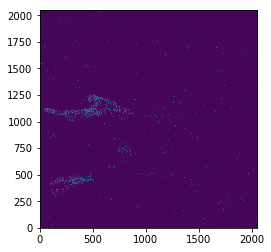

In [5]:
# Plot the second image in the list
NIX_Darks[1].plotImage()

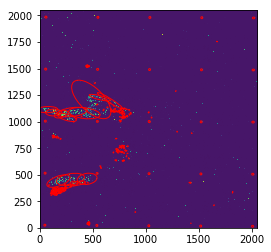

In [6]:
# Detect objects in an image. Requires 'sep'.
test_ids = ['PER-085-03-1']
config = {'test_ids' : test_ids, 'data_dir' : data_dir}
NIX_DM_Images = NIX_Image_List(config)

# Plot the objects
# Since this is an engineering array. Bad pixels are problematic as seen below.
objects = NIX_DM_Images[0].getObjects()
NIX_DM_Images[0].plotObjects()

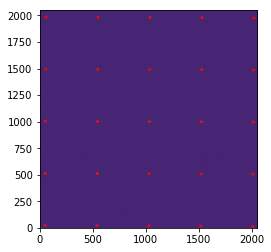

In [7]:
# How to generate and load bad pixel masks.
NIX_Darks.doBadPixelMask(out='BP_mask.fits')
BP_Mask = NIX_Image('BP_mask.fits')

# After specifying a BP mask, bad pixels are filtered (set to 0)
del NIX_DM_Images[0].objects # This is needed since we calculated objects above.
objects = NIX_DM_Images[0].getObjects(mask=BP_Mask)
NIX_DM_Images[0].plotObjects(mask=BP_Mask)

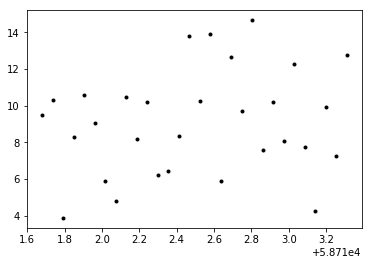

In [8]:
# Calculate the median value of all images stored in an array and plot. 
dark_level = NIX_Darks.getMedian()
time = NIX_Darks.getHeaderValue('MJD_OBS')
plt.plot(time, dark_level, 'k.')
plt.show()

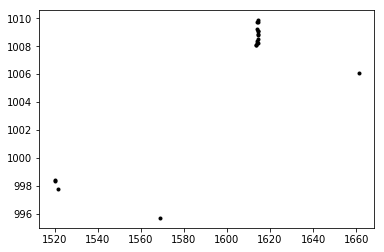

In [9]:
# Similar example getting the x,y locations of detected objects
search = {'x' : 1523, 'y' : 998, 'r' : 200}
NIX_DM_Images.filter(slice(0, 19, 1)) # Select images with python slice, not ideal but does the job
objects_x = NIX_DM_Images.getObjects(mask=BP_Mask, search=search, sepdict='x')
objects_y = NIX_DM_Images.getObjects(mask=BP_Mask, search=search, sepdict='y')
plt.plot(objects_x, objects_y, 'k.')
plt.show()

In [10]:
# Use this function to see selected files for operation
NIX_DM_Images.printFiltered(keywords, tbl_fmt)

 NDX             TEST_ID,                                FILENAME,             MJD-OBS,    DET_READ_CURNAME
0000        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0002.fits,       58724.6739304,    SLOW_UP_THE_RAMP
0001        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0003.fits,        58724.678104,    SLOW_UP_THE_RAMP
0002        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0004.fits,       58724.6791624,    SLOW_UP_THE_RAMP
0003        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0005.fits,       58724.6803261,    SLOW_UP_THE_RAMP
0004        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0006.fits,       58724.6892848,    SLOW_UP_THE_RAMP
0005        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0007.fits,       58724.6903278,    SLOW_UP_THE_RAMP
0006        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0008.fits,        58724.691476,    SLOW_UP_THE_RAMP
0007        PER-085-03-1,    ERIS_NIXIMG_TEC_LABTEST241_0009.fits,       58724.6928065,    SLOW_UP_THE_RAMP
0008        PER-085-03-1,   